# Overlord AI
For information about this project, see [this README.md](../doc/README.md)


## TODO:

* [x] notebook source list
* [x] notebook downloads
* [ ] dataset downloads
* [ ] dataset processing
* [ ] model training

# CODE STARTS HERE

First we import all the libraries and whatnot

# imports


In [1]:
import requests # for webscraping
import pandas as pd # storing data
import numpy as np # visualisation sorting etc
import pylab as pyl # data visualisation
import matplotlib.pyplot as plt # data visualisation
import os # for running commands
import re # regex filtering of scraped data

%matplotlib inline

# definitions
These definitions are used later in the script and are collected here for ease of adjustment.
- useScrapedCsv(bool) can be used to use local data from previous runs. 
- downloadWorkbooks(bool) and downloadDatasets(bool) can be used to download the actual data so the workbooks/datasets can be used offline.
- maxTagLength(int) is the maximum amount of characters in a tag name.
- maxDataSourseLinkLength(int) is the maximum length a link to a datasource can have.

In [2]:
useScrapedCsv = False
downloadWorkbooks = False
downloadDatasets = False

maxTagLength = 40
maxDataSourceLinkLength = 200

# reading data


## data gathering

In [3]:
df = pd.DataFrame([], columns=[
                  'index', 'link', 'requeststatus', 'content'])
sourcelist = pd.read_csv("../data/models/sourcesShort.csv")                  
index = 0
    
if(useScrapedCsv):
    df = pd.read_csv("kaggleScrape.csv", index_col=0)
else:
    # print(sourcelist)
    for item in sourcelist['Sources']:  # loop through sources
        print(index)
        r = requests.get(item)  # get the html data
        # add data to the df
        if(r.status_code==200):
            print("response: %s"%r.status_code)
            new_row = [index, item, r.status_code, r.text]
        else:
            print("response WARNING: %s"%r.status_code)
            new_row = [index, item, r.status_code, ""]
        df.loc[index] = new_row
        index += 1
if (downloadWorkbooks and not useScrapedCsv):
    for item in sourcelist['Sources']:
        # download the workbooks
        print(index)
        kagglelink = item.replace('https://www.kaggle.com/code/', "")
        dirname = kagglelink.split("/")[1]
        command = "kaggle k pull " + kagglelink + " -p ../data/.models/"+dirname+"/src/"
        print(command)
        #os.system('%s' % command)
        index += 1
print("data gathered")

0
response: 200
1
response: 200
2
response: 200
3
response: 200
4
response: 200
5
response: 200
6
response: 200
7
response: 200
8
response: 200
9
response: 200
10
response: 200
11
response: 200
12
response: 200
13
response: 200
14
response: 200
15
response: 200
16
response: 200
17
response: 200
18
response: 200
19
response: 200
data gathered


### get dataset link

In [4]:

# from logging import exception

# #TODO YEET ALL THIS IN DATASET GATHERING

# def isNaN(string):
#         return string != string
# successful =0
# failed = 0
# if (downloadDatasets):
#         for index,  row in df.iterrows():
#                 print(index)
#                 kagglelink = str(df.loc[df['index'] == index, 'link'].replace('https://www.kaggle.com/code/', ""))
#                 #print("ASDF %s"%kagglelink)
#                 #print (type(datalink))
#                 dirname = kagglelink.split("/")[1]
#                 # download the dataset
#                 try:
#                         for sourceCount in range(3):
#                                 datalink = df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount]
#                                 #print(type(datalink))
#                                 #print(datalink)
#                                 if(type(datalink[0])!=float):
#                                         #kagglelink = str(df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount].replace('https://www.kaggle.com/code/', ""))
#                                         #print("AAAAAAAAAAAAAAAAAAa")
#                                         #print(type(datalink[0]))
#                                         print(datalink[0])
#                                         command = "kaggle datasets download -d " + str(datalink[0]) + " -p ../data/.models/"+str(dirname)+"input/"
#                                         print(command)
#                                         #os.system('%s' % command)
#                                         successful+=1
#                 except:
#                         #print(type(datalink[0]))
#                         #print(datalink[0])
#                         print(exception)
#                         failed +=1   
#         print("________________________________________")
#         print("%d dataset(s) downloaded successfully"%successful)
#         print("%d dataset(s) failed to download"%failed)
#         print("%d total dataset(s)"%(successful+failed))
# else:
#         print("skipped dataset downloading")                     

## transform data

### get dataset

This block of code will fetch all the datasets

In [5]:
def getDataSets(index,row):
    #print(index)
    # print(row['content'])
    iter =0
    index2=0
    df.loc[df['index'] == index, 'dataSourceCount']=0
    dataSourceUrl = re.findall("\"dataSourceUrl\"\:.{,%d}\"thumbnailUrl\""%maxDataSourceLinkLength, row['content']) # TODO make other stuff like this (tags)
    if(dataSourceUrl):
        #print("Dataset Url: %s"%dataSourceUrl)
        for source in dataSourceUrl:
            sourceClean = re.split(':|,|"', source)[4]
            df.loc[df['index'] == index, 'dataSourceUrl%d'%index2] = str(sourceClean)
            print("Dataset Url: %s"%sourceClean)
            if(downloadDatasets and not useScrapedCsv):
                sourceSplit = sourceClean.split('/', maxsplit=2)
                if(sourceSplit[1]=='datasets'):
                    command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                    print(command)
                    #os.system('%s' % command)
                if(sourceSplit[1]=='competitions'):
                    command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                    print(command)
                    #os.system('%s' % command)
                if(sourceSplit[1]=='kaggle'):
                    print("no dataset")
                #print(sourceSplit)
                # command = "kaggle datasets download -d " + sourceClean + " -p ../data/.models/"+str(dirname)+"input/"
                # print(command)
                #os.system('%s' % command)
            index2 +=1
        df.loc[df['index'] == index, 'dataSourceCount']=index2
    if(downloadDatasets and not useScrapedCsv):
        print("Finished downloading datasets")
    else:
        print("Skipped downloading datasets")

### get execution time

In [6]:
# html parsing
def getExecTime(index,row):

    # print(index)
    # print(row['content'])
    runTime = float(re.split(":", re.findall(
        "\"runTimeSeconds\"\:[0-9]+\.[0-9]+", row['content'])[0])[1])
    print("runtime in seconds: %f"%runTime)
    df.loc[df['index'] == index, 'runTime'] = runTime


### get upvotes

In [7]:
# html parsing
def getUpvotes(index,row):
    # print(index)
    # print(row['content'])
    upvoteCount = int(re.split(":", re.findall(
        "\"upvoteCount\"\:[0-9]+", row['content'])[0])[1])
    print("upvotes: %d"%upvoteCount)
    df.loc[df['index'] == index, 'upvoteCount'] = upvoteCount


### get tags

In [8]:
def getTags(index, row):
# for index, row in df.iterrows():
    tags = re.findall("\"tags\"\:\[.+\"\}\]\,\"upvoteCount\"", row['content'])
    tagsFormatted = ""

    # this is here so it's before all the hot encoded stuff
    df.loc[df['index'] == index, 'tagCount'] = 0
    df.loc[df['index'] == index, 'tags'] = tagsFormatted
    
    if (tags):
        for iter in range(maxTagLength):
            temp = re.findall("\"slug\"\:\".{%d}\"\,\"url" % iter, tags[0])

            if (temp):
                temp = re.split(':|,|"', temp[0])[4]
                # print(temp)
                # hot encoded tags
                df.loc[df['index'] == index, "%s_t"%temp] = 1
                tagsFormatted = tagsFormatted + temp + " "
        df.loc[df['index'] == index, 'tagCount'] = tagsFormatted.count(' ') 
    print("tag count: %d"%tagsFormatted.count(' '))
    print("tags: %s"%tagsFormatted)  # human readable, space delimited list of the tags
    df.loc[df['index'] == index, 'tags'] = tagsFormatted


In [9]:

for index, row in df.iterrows():
    print(index)
    getExecTime(index,row)
    getUpvotes(index,row)
    getDataSets(index,row)


# df.to_csv('kaggleScrape.csv', index=True)

# for index, row in df.iterrows():
#     df.loc[df['index'] == index, 'content'] = ""

0
runtime in seconds: 861.112981
upvotes: 4232
Dataset Url: /datasets/mlg-ulb/creditcardfraud
Skipped downloading datasets
1
runtime in seconds: 1206.104310
upvotes: 3360
Dataset Url: /competitions/home-credit-default-risk
Skipped downloading datasets
2
runtime in seconds: 20.786203
upvotes: 2699
Dataset Url: /competitions/titanic
Skipped downloading datasets
3
runtime in seconds: 386.320938
upvotes: 2517
Dataset Url: /competitions/titanic
Skipped downloading datasets
4
runtime in seconds: 22.583234
upvotes: 2316
Dataset Url: /datasets/uciml/biomechanical-features-of-orthopedic-patients
Skipped downloading datasets
5
runtime in seconds: 48.534224
upvotes: 2275
Dataset Url: /datasets/ardamavi/sign-language-digits-dataset
Skipped downloading datasets
6
runtime in seconds: 49.849152
upvotes: 1669
Dataset Url: /datasets/uciml/breast-cancer-wisconsin-data
Skipped downloading datasets
7
runtime in seconds: 2790.507509
upvotes: 1261
Dataset Url: /datasets/authman/pickled-glove840b300d-for-10s

In [10]:
for index, row in df.iterrows():
    print(index)
    getTags(index,row) # must always be last and grouped so can't be run at the same time as the other gets as getDataSets can split up the tag columns

0
tag count: 4
tags: finance classification data-visualization dimensionality-reduction 
1
tag count: 3
tags: eda beginner classification 
2
tag count: 2
tags: classification feature-engineering 
3
tag count: 5
tags: eda ensembling classification model-comparison data-visualization 
4
tag count: 2
tags: beginner classification 
5
tag count: 4
tags: beginner deep-learning classification neural-networks 
6
tag count: 4
tags: healthcare classification data-visualization feature-engineering 
7
tag count: 3
tags: eda beginner classification 
8
tag count: 3
tags: eda classification feature-engineering 
9
tag count: 5
tags: eda beginner classification data-visualization feature-engineering 
10
tag count: 5
tags: eda business classification data-visualization feature-engineering 
11
tag count: 3
tags: marketing clustering classification 
12
tag count: 5
tags: cnn beginner classification image-processing binary-classification 
13
tag count: 5
tags: eda finance beginner classification data-visua

In [11]:
df2=0
df2 = pd.DataFrame([], columns=[
                  'index', 'link', 'requeststatus', 'notebookContent'])
if(useScrapedCsv):
    df2=pd.read_csv("notebookScrape.csv",index_col=0)
else:
    for index, row in df.iterrows():
        print(index)
        # print(row['content'])
        noteBookLinkRaw=re.findall(
            "\"renderedOutputUrl\"\:\"https\:\/\/www\.kaggleusercontent\.com\/kf\/\d+\/.+\/__result[sx]__\.html\?sharingControls=true\"\,\"", row['content'])
        try:
            noteBookLink = re.split(":",noteBookLinkRaw[0] , maxsplit=1)[1]
            noteBookLink = noteBookLink.strip(' " " ')
            print("Notebook link: %s" % noteBookLink)
            # df.loc[df['index'] == index, 'noteBookLink'] = noteBookLink
            r = requests.get(noteBookLink)
            new_row = [index, noteBookLink, r.status_code, r.text]
            df2.loc[index] = new_row
        except:
            print("No notebook link found, double check if this is a notebook or something else!")
            r=0
        


0
Notebook link: https://www.kaggleusercontent.com/kf/16695845/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..NgA7LbposTj2_H9i4V1SLg.GBWq4lSBynkhAaH-ShHyeL4vyO3-iumsdUsDA-6fU6faI7kfGw7RQoIzaivfyNKIZCtACbh8VND7rkHw6DAPBGljnR2nCYXGXmR9zhwO327NQIxpAwSY31pVUUKM8EhJZGQhlWO62mF8N86HNgDF56y15rymBv1M3Zrzr-2ykocotBZ5C8H54cEfucRspS25Om78KthI3Id5qk1BfiG6jHEj65TXQiE7jmuHg1VzNNAa9Bmqpgpe0HlH3Ma2r6-HT3lDe20KbmA3KyP7ratzalmK70U28HlwvL2alSqRxrZznsvAC-LRsdRFs583wTv9snh0n-nqMgjnA1JU74rmOj0m5RAsjYbHv1S0QB4zMu2WoI_5no40vrODCi6PItOByB-ZS-uwr2siju7QCgxBLIRsu0ipHmMQtmGlyRs0DpSItv_GGpV1WTeKnK2QddX7sMPiHD2MGFllV6lZ3fHvqZPo2uFno6IXorK4Rv-7mGIk__qYC2g3CTbwrEMo6YbuAcmHf2W3I9_W0mO6wYmsCIghDOrQeNIW9oQV_p56roKxyHQ3YifE8yGJEzVhq-aBUsljOyGSCGoE1Nu221f8jTwZieAM9CBciyh2PcUv8-NdvPq7qgyfWX0FD4vYmE_WZ9jysiCEzjGEjrn5e00VG0PdgzdUC9PpGks59WHqZzu1EKd38Nuqw-TB6eE6gWZR.GgsL91wp3TDPMwA9cLNAOg/__results__.html?sharingControls=true",
1
Notebook link: https://www.kaggleusercontent.com/kf/5301226/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0J

In [12]:
#process the notebook data
# for index, row in df2.iterrows():
def getImports(index, row):
    # print(index)
    # "tags"":[]
    imports = re.findall("\<span class\=\"kn\"\>import\<\/span\> \<span class\=\"nn\"\>[a-zA-Z0-9\-]+\<\/span\>", row['notebookContent'])
    # print(tags)
    importsFormatted = ""
    # this is here so it's before all the hot encoded stuff
    df.loc[df['index'] == index, 'importCount'] = 0
    df.loc[df['index'] == index, 'imports'] = importsFormatted

    if (imports):
        print(index)
        for import_ in imports:
            importClean=re.sub(r"<span class=\"kn\">import</span> <span class=\"nn\">", "", import_)
            importClean=re.sub(r"</span>", "", importClean)
            #print(importClean)
            if not importsFormatted.__contains__(importClean):
                importsFormatted = importsFormatted + importClean + " "
                df.loc[df['index'] == index, "%s_i"%importClean] = 1
                #df[importsFormatted] = df[importsFormatted].fillna(0)
    df.loc[df['index'] == index, 'imports'] = importsFormatted
    df.loc[df['index'] == index, 'importCount'] = importsFormatted.count(' ') 
    print("Import count: %d"%importsFormatted.count(' '))
    print("Imports: %s"%importsFormatted)

# del df2 # clear the memory

In [13]:
for index, row in df2.iterrows():
    getImports(index,row)

0
Import count: 9
Imports: numpy pandas tensorflow seaborn time collections warnings keras itertools 
1
Import count: 7
Imports: numpy pandas os warnings seaborn lightgbm gc 
2
Import count: 3
Imports: pandas numpy seaborn 
3
Import count: 5
Imports: numpy pandas seaborn warnings xgboost 
4
Import count: 4
Imports: numpy pandas seaborn warnings 
5
Import count: 3
Imports: numpy pandas warnings 
6
Import count: 5
Imports: numpy pandas seaborn time warnings 
7
Import count: 9
Imports: gc re string operator numpy pandas seaborn tokenization tensorflow 
8
Import count: 9
Imports: gc os logging datetime warnings numpy pandas seaborn lightgbm 
Import count: 0
Imports: 
10
Import count: 15
Imports: numpy pandas os lightgbm xgboost time datetime gc seaborn warnings eli5 shap json altair networkx 
11
Import count: 6
Imports: pandas numpy matplotlib seaborn datetime itertools 
12
Import count: 4
Imports: numpy pandas random os 
13
Import count: 5
Imports: tensorflow pandas seaborn numpy time 
14

## export data

In [14]:
df.to_csv('kaggleScrape.csv', index=True)
df2.to_csv('notebookScrape.csv', index=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        20 non-null     int64  
 1   link                         20 non-null     object 
 2   requeststatus                20 non-null     int64  
 3   content                      20 non-null     object 
 4   runTime                      20 non-null     float64
 5   upvoteCount                  20 non-null     float64
 6   dataSourceCount              20 non-null     float64
 7   dataSourceUrl0               18 non-null     object 
 8   dataSourceUrl1               3 non-null      object 
 9   dataSourceUrl2               2 non-null      object 
 10  tagCount                     20 non-null     float64
 11  tags                         20 non-null     object 
 12  finance_t                    2 non-null      float64
 13  classification_t      

In [16]:
df.describe()

,index,requeststatus,runTime,upvoteCount,dataSourceCount,tagCount,finance_t,classification_t,data-visualization_t,dimensionality-reduction_t,...,json_i,altair_i,networkx_i,matplotlib_i,random_i,scipy_i,langdetect_i,sys_i,gensim_i,torch_i
count,20.00000,20.0,20.000000,20.000000,20.00000,20.00000,2.0,20.0,8.0,1.0,...,2.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0
mean,9.50000,200.0,2955.878771,1504.800000,1.15000,4.10000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,5.91608,0.0,6164.811268,1053.077475,0.74516,1.68273,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,0.00000,200.0,10.160655,529.000000,0.00000,2.00000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.75000,200.0,49.520420,735.250000,1.00000,3.00000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,9.50000,200.0,1033.608645,1109.000000,1.00000,4.00000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,14.25000,200.0,2492.558816,2285.250000,1.00000,5.00000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,19.00000,200.0,27493.298228,4232.000000,3.00000,10.00000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
df.head()

,index,link,requeststatus,content,runTime,upvoteCount,dataSourceCount,dataSourceUrl0,dataSourceUrl1,dataSourceUrl2,...,json_i,altair_i,networkx_i,matplotlib_i,random_i,scipy_i,langdetect_i,sys_i,gensim_i,torch_i
0,0,https://www.kaggle.com/code/janiobachmann/cred...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",861.112981,4232.0,1.0,/datasets/mlg-ulb/creditcardfraud,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.kaggle.com/code/willkoehrsen/start...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",1206.104310,3360.0,1.0,/competitions/home-credit-default-risk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.kaggle.com/code/yassineghouzam/tit...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",20.786203,2699.0,1.0,/competitions/titanic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.kaggle.com/code/ash316/eda-to-pred...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",386.320938,2517.0,1.0,/competitions/titanic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.kaggle.com/code/kanncaa1/machine-l...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",22.583234,2316.0,1.0,/datasets/uciml/biomechanical-features-of-orth...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

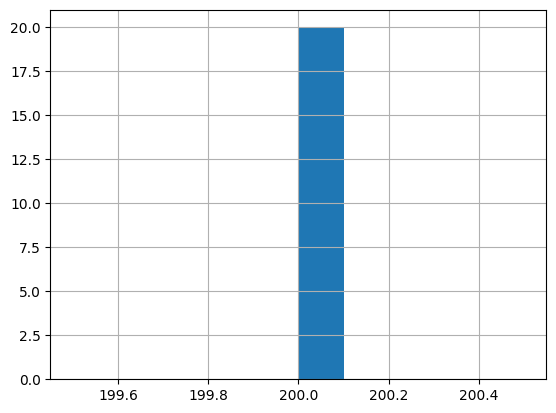

In [18]:
df['requeststatus'].hist()

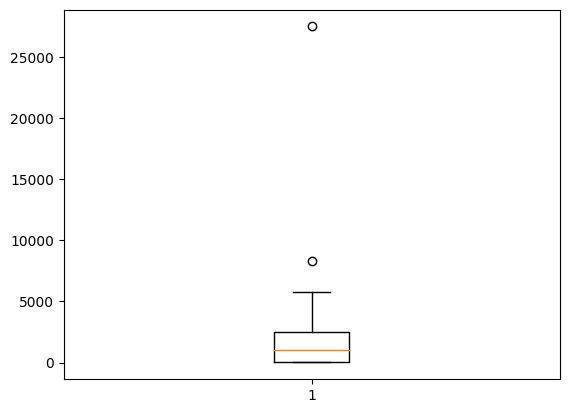

In [19]:
plt.boxplot(df['runTime'])
plt.show()

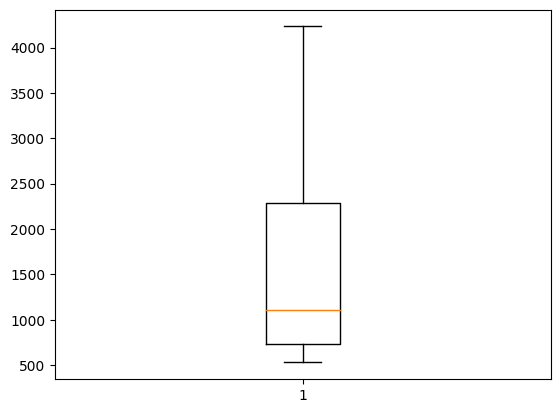

In [20]:
plt.boxplot(df['upvoteCount'])
plt.show()

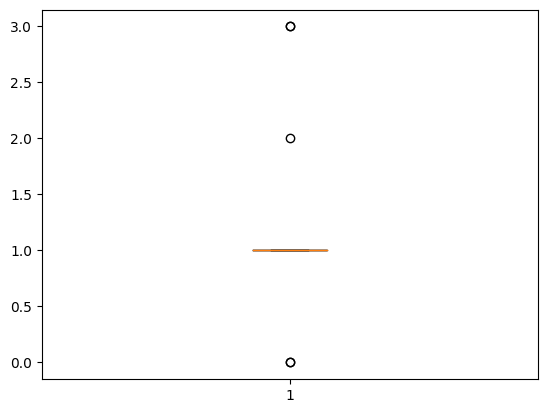

In [21]:
plt.boxplot(df['dataSourceCount'])
plt.show()

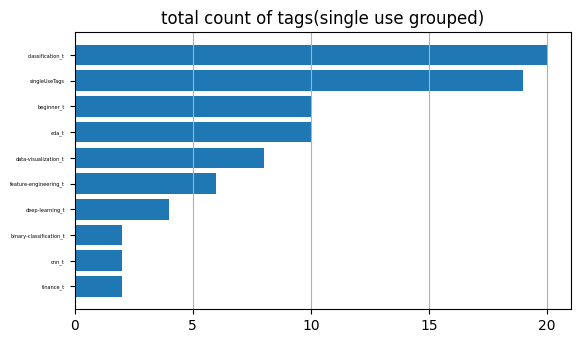

In [22]:
dftemp = pd.DataFrame([[0,"singleUseTags"]], columns=[
                  'height', 'bars'])
inLoop = False
index =1
singleUseTags=0
for column in df:
    #print(column)
    if(column=='imports'):
        inLoop=False
    if(inLoop):
        if(df[column].value_counts()[1]<2):
            singleUseTags+= df[column].value_counts()[1]
            dftemp.loc[0,"height"] =singleUseTags
        else:
            dftemp.loc[index,"bars"] = str(column)
            dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='tags'):
        inLoop = True

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of tags(single use grouped)')
plt.show() 
#del dftemp # clear the memory

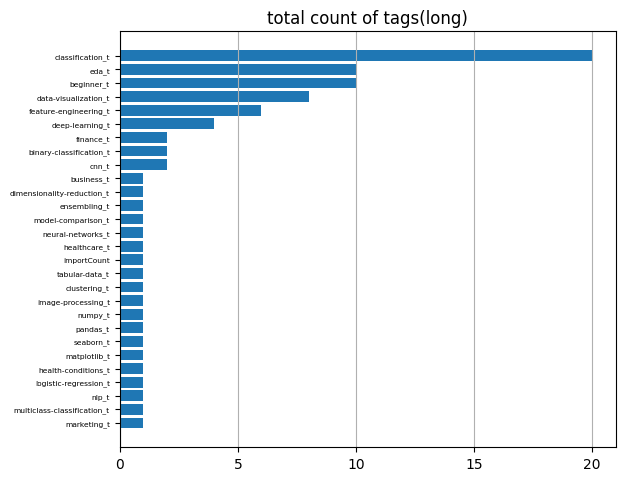

In [23]:
dftemp = pd.DataFrame([], columns=['height', 'bars'])
inLoop = False
index =0
singleUseTags=0
for column in df:
    #print(column)
    if(column=='imports'):
        inLoop=False
    if(inLoop):
        
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='tags'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of tags(long)')
plt.show() 

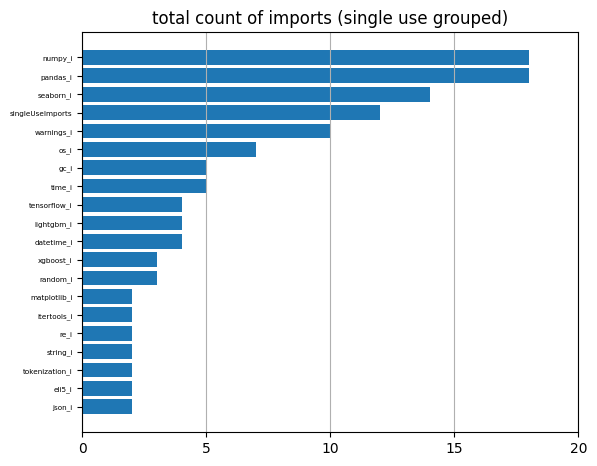

In [24]:
dftemp = pd.DataFrame([[0,"singleUseImports"]], columns=[
                  'height', 'bars'])
inLoop = False
index =1
singleUseImports=0
for column in df:
    #print(column)
    # if(column=='imports'):
    #     inLoop=False
    if(inLoop):
        if(df[column].value_counts()[1]<2):
            singleUseImports+= df[column].value_counts()[1]
            dftemp.loc[0,"height"] =singleUseImports
        else:
            dftemp.loc[index,"bars"] = str(column)
            dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='imports'):
        inLoop = True

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of imports (single use grouped)')
plt.show() 
#del dftemp # clear the memory

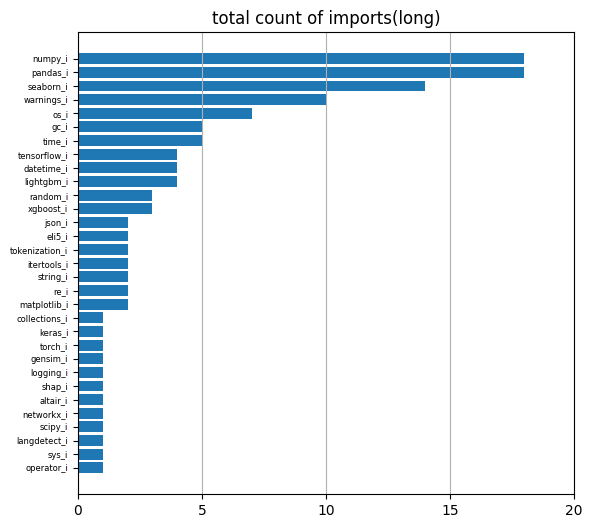

In [25]:
dftemp = pd.DataFrame([], columns=['height', 'bars'])
inLoop = False
index =0
for column in df:
    #print(column)
    # if(column=='imports'):
    #     inLoop=False
    if(inLoop):
        
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='imports'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
f=plt.figure()
scaleValue = dftemp.index.max()/5
f.set_figheight(scaleValue)
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.yticks(fontsize=scaleValue)
plt.xticks(np.arange(0, max(dftemp.height)+5, 5))
plt.grid(visible=None, which='major', axis='x')
plt.title('total count of imports(long)')
plt.show() 

In [26]:
# del df
# del df2
# del dftemp

#TODO
data scraping
- dataset size
- df info/describe